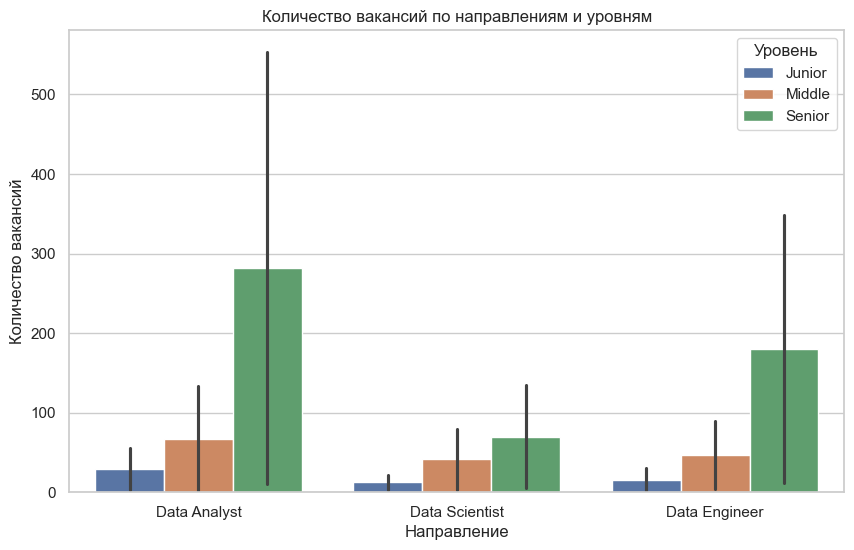

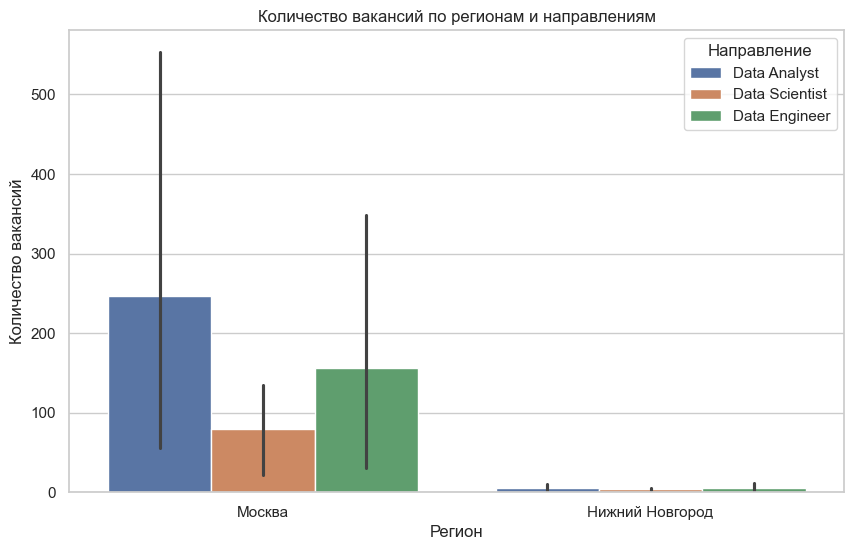

In [9]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

sns.set(style="whitegrid")
%matplotlib inline

# Направления и уровни, по которым будем искать вакансии
positions = ["Data Analyst", "Data Scientist", "Data Engineer"]
levels = ["Junior", "Middle", "Senior"]

# Словарь соответствия регионов и их идентификаторов на hh.ru
regions = {
    "Москва": 1,
    "Нижний Новгород": 66,
}


def get_vacancies_count(position, level, region_id):
    """
    Получает количество вакансий для заданной позиции, уровня и региона.
    """
    url = "https://api.hh.ru/vacancies"
    params = {
        "text": f"{position} {level}",
        "area": region_id,
        "per_page": 0  # Нам не нужны сами вакансии, только их количество
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data.get('found', 0)


# Создаем пустой DataFrame для хранения результатов
df_results = pd.DataFrame(columns=["Регион", "Направление", "Уровень", "Количество вакансий"])

# Проходим по всем комбинациям регионов, позиций и уровней
for region_name, region_id in regions.items():
    for position in positions:
        for level in levels:
            vacancies_count = get_vacancies_count(position, level, region_id)
            # Создаем временный DataFrame с новыми данными
            temp_df = pd.DataFrame({
                "Регион": [region_name],
                "Направление": [position],
                "Уровень": [level],
                "Количество вакансий": [vacancies_count]
            })
            # Объединяем с основным DataFrame
            df_results = pd.concat([df_results, temp_df], ignore_index=True)


df_results


# ### Общее количество вакансий по направлениям

plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x="Направление", y="Количество вакансий", hue="Уровень")
plt.title("Количество вакансий по направлениям и уровням")
plt.xlabel("Направление")
plt.ylabel("Количество вакансий")
plt.legend(title="Уровень")
plt.show()

# ### Количество вакансий по регионам

plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x="Регион", y="Количество вакансий", hue="Направление")
plt.title("Количество вакансий по регионам и направлениям")
plt.xlabel("Регион")
plt.ylabel("Количество вакансий")
plt.legend(title="Направление")
plt.show()



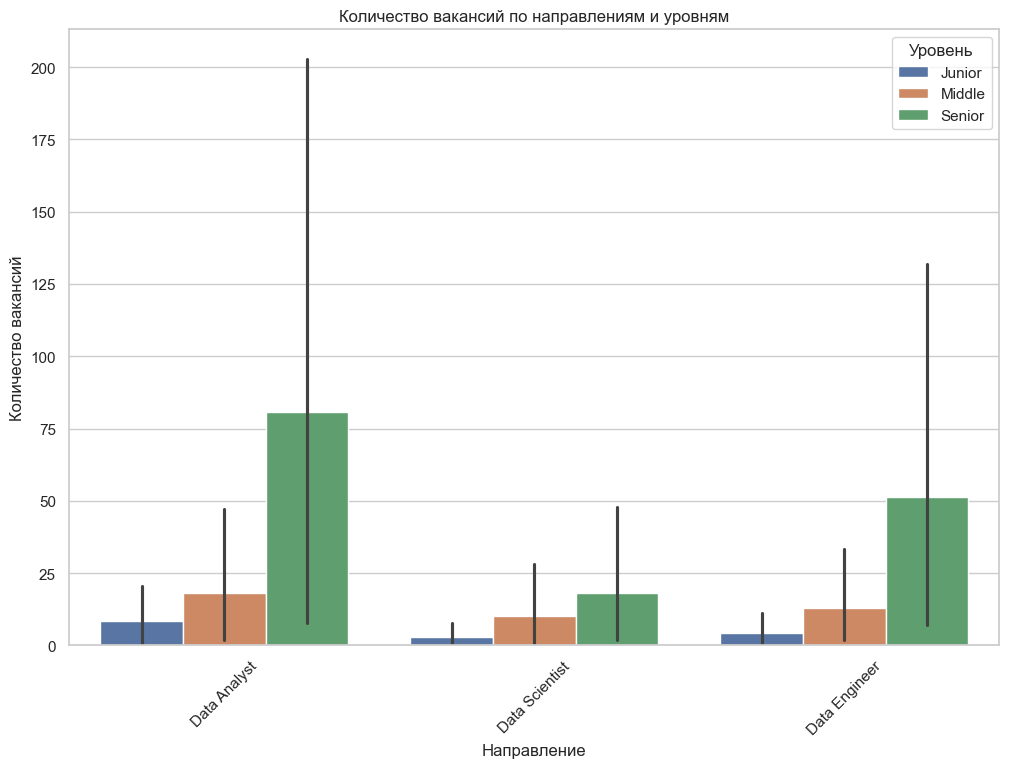

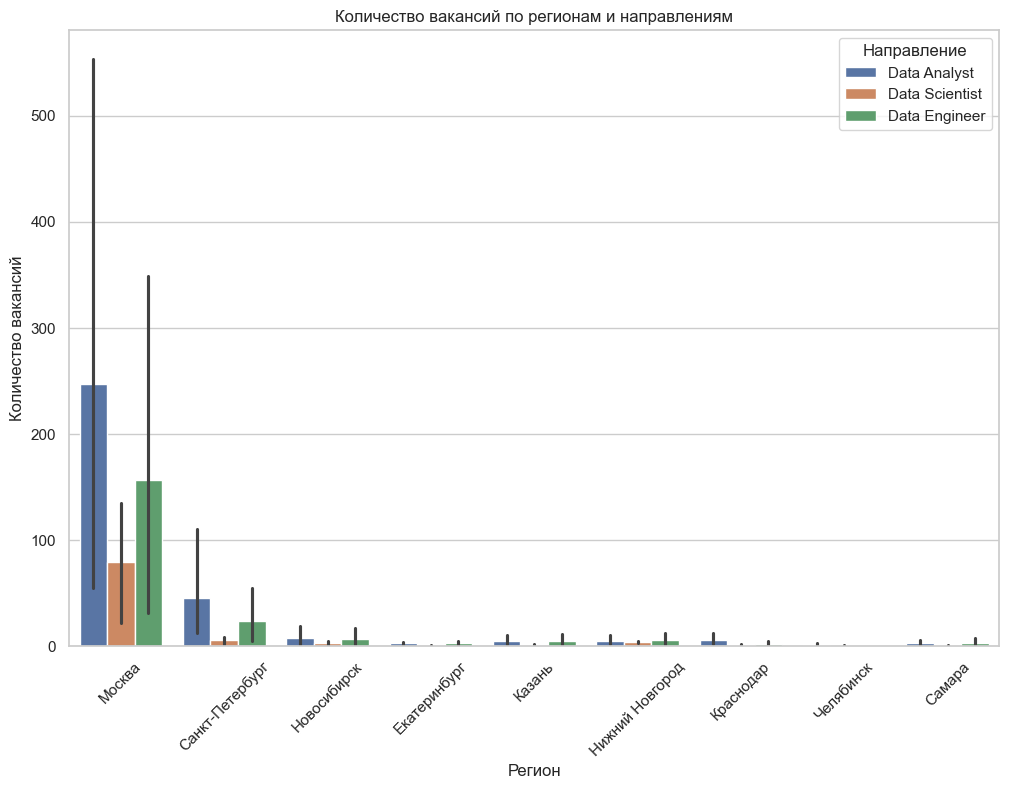

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

sns.set(style="whitegrid")
%matplotlib inline

# Направления и уровни, по которым будем искать вакансии
positions = ["Data Analyst", "Data Scientist", "Data Engineer"]
levels = ["Junior", "Middle", "Senior"]

# Словарь соответствия регионов и их идентификаторов на hh.ru
regions = {
    "Москва": 1,
    "Санкт-Петербург": 2,
    "Новосибирск": 4,
    "Екатеринбург": 3,
    "Казань": 88,
    "Нижний Новгород": 66,
    "Краснодар": 53,
    "Челябинск": 104,
    "Самара": 78
}


def get_vacancies_count(position, level, region_id):
    """
    Получает количество вакансий для заданной позиции, уровня и региона.
    """
    url = "https://api.hh.ru/vacancies"
    params = {
        "text": f"{position} {level}",
        "area": region_id,
        "per_page": 0  # Нам не нужны сами вакансии, только их количество
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data.get('found', 0)

# ## Сбор данных

df_results = pd.DataFrame(columns=["Регион", "Направление", "Уровень", "Количество вакансий"])

for region_name, region_id in regions.items():
    for position in positions:
        for level in levels:
            vacancies_count = get_vacancies_count(position, level, region_id)
            # Создаем временный DataFrame с новыми данными
            temp_df = pd.DataFrame({
                "Регион": [region_name],
                "Направление": [position],
                "Уровень": [level],
                "Количество вакансий": [vacancies_count]
            })
            # Объединяем с основным DataFrame
            df_results = pd.concat([df_results, temp_df], ignore_index=True)


df_results


plt.figure(figsize=(12, 8))  
sns.barplot(data=df_results, x="Направление", y="Количество вакансий", hue="Уровень")
plt.title("Количество вакансий по направлениям и уровням")
plt.xlabel("Направление")
plt.ylabel("Количество вакансий")
plt.legend(title="Уровень")
plt.xticks(rotation=45) 
plt.show()

# ### Количество вакансий по регионам

plt.figure(figsize=(12, 8))  # Увеличиваем размер графика
sns.barplot(data=df_results, x="Регион", y="Количество вакансий", hue="Направление")
plt.title("Количество вакансий по регионам и направлениям")
plt.xlabel("Регион")
plt.ylabel("Количество вакансий")
plt.legend(title="Направление")
plt.xticks(rotation=45)  # Поворачиваем подписи на оси X
plt.show()



Честно говоря, меня несколько настораживает востребованность джунов и невероятный спрос на сеньоров. По-логике -- если не брать на работу людей с начальным уровнем компетенции -- некому будет расти.